# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


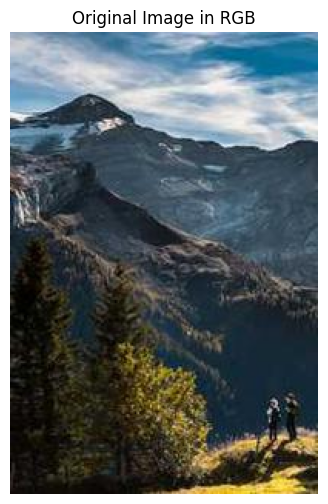

In [87]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
# Importing and plotting the rgb image
from PIL import Image
import requests
import io
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

url = "https://picsum.photos/200/300"

response = requests.get(url)

image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img_bgr = cv.imdecode(image_array, cv.IMREAD_COLOR)

img_rgb=cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()

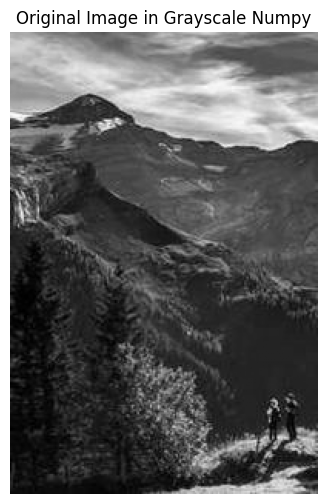

In [88]:
# Converting the image to a grayscale image
R = img_rgb[:, :, 0].astype(np.float32)
G = img_rgb[:, :, 1].astype(np.float32)
B = img_rgb[:, :, 2].astype(np.float32)
gray_numpy = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(gray_numpy,cmap="gray")
plt.axis("off")
plt.title("Original Image in Grayscale Numpy")
plt.show()

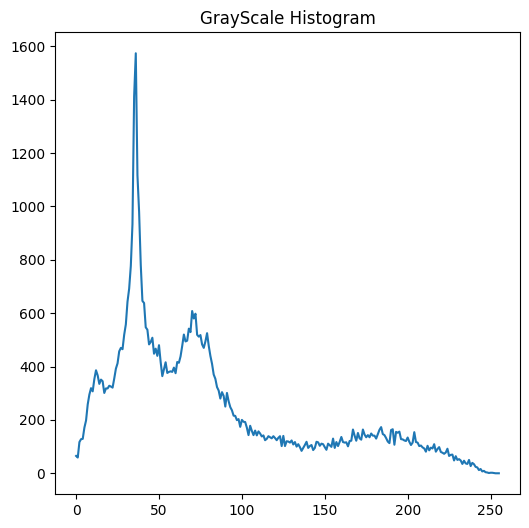

In [89]:
# GrayScale Histogram
def gray_histogram(gray_img):
  hist = np.zeros(256, dtype=int) # Initialize hist as a NumPy array of zeros
  for i in range(256):
    hist[i] = np.sum(gray_img == i)
  return hist
plt.figure(figsize=(6,6))
plt.plot(gray_histogram(gray_numpy))
plt.title("GrayScale Histogram")
plt.show()

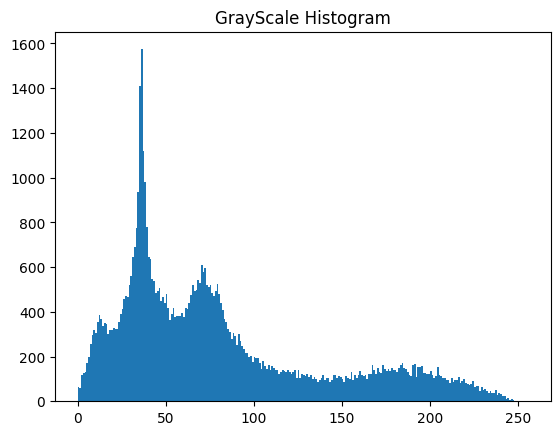

In [90]:
# Using MatPlotLib
plt.hist(gray_numpy.ravel(), bins=256, range=(0,256))
plt.title("GrayScale Histogram")
plt.show()

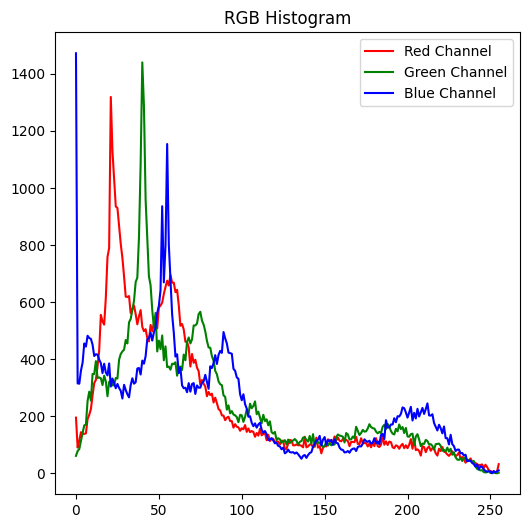

In [91]:
# 2.RGB histogram using NumPY
def rgb_histogram(img_rgb_input):
  hist_r=np.zeros(256,dtype=int)
  hist_g=np.zeros(256,dtype=int)
  hist_b=np.zeros(256,dtype=int)

  for i in range(img_rgb_input.shape[0]):
    for j in range(img_rgb_input.shape[1]):
      hist_r[img_rgb_input[i,j,0]]+=1
      hist_g[img_rgb_input[i,j,1]]+=1
      hist_b[img_rgb_input[i,j,2]]+=1
  return hist_r,hist_g,hist_b

plt.figure(figsize=(6,6))
hist_r, hist_g, hist_b = rgb_histogram(img_rgb)
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title("RGB Histogram")
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

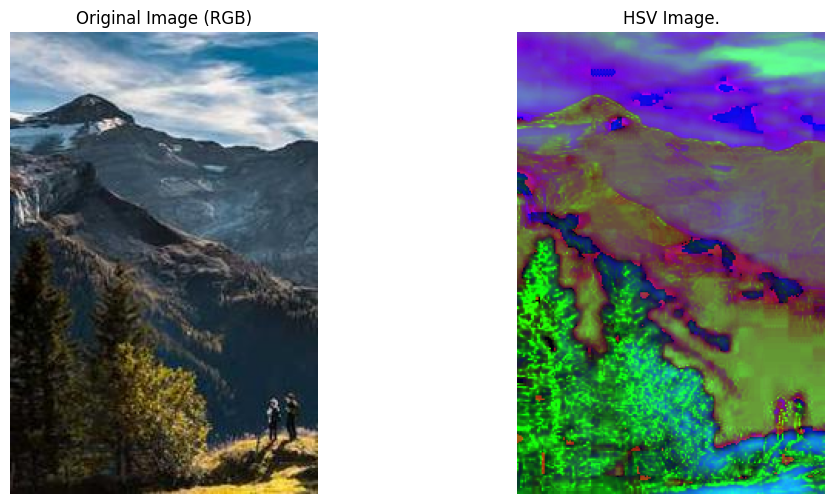

In [92]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
def rgb_to_hsv(img_rgb):

  img_float = img_rgb.astype(np.float32) / 255.0

  # Extracting rg and b channels
  r = img_float[:,:,0]
  g = img_float[:,:,1]
  b = img_float[:,:,2]

  # calculating cmax,cmin,delta
  cmax = np.max(img_float, axis=2)
  cmin = np.min(img_float, axis=2)
  delta = cmax - cmin

  # Initializing HSV channels
  h = np.zeros_like(cmax)
  s = np.zeros_like(cmax)
  v = cmax


  # Identifying pixels where delta is not zero to avoid division by zero
  non_zero_delta = delta != 0

  # Conditions for hue calculation based on which channel is Cmax
  cond_r = (cmax == r) & non_zero_delta
  cond_g = (cmax == g) & non_zero_delta
  cond_b = (cmax == b) & non_zero_delta

  # Apply hue calculation based on conditions
  h[cond_r] = (((g[cond_r] - b[cond_r]) / delta[cond_r])) % 6
  h[cond_g] = (((b[cond_g] - r[cond_g]) / delta[cond_g]) + 2)
  h[cond_b] = (((r[cond_b] - g[cond_b]) / delta[cond_b]) + 4)

  h = h * 60.0
  h[h < 0] += 360 # This step is to ensure that the hue is positive ie this converts any negative value to positive value by adding 360 degrees.

  h = h / 2.0

  # Saturation
  # Identifying pixels where Cmax is not zero to avoid division by zero
  non_zero_v = cmax != 0
  s[non_zero_v] = (delta[non_zero_v] / cmax[non_zero_v]) * 255

  v = v * 255

  h = np.clip(h, 0, 179).astype(np.uint8)
  s = np.clip(s, 0, 255).astype(np.uint8)
  v = np.clip(v, 0, 255).astype(np.uint8)

  # Stack the H, S, V channels to form an HSV image array
  hsv_image_np = np.dstack([h, s, v])

  return hsv_image_np


hsv_output = rgb_to_hsv(img_rgb)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image (RGB)")

plt.subplot(1, 2, 2)
plt.imshow(hsv_output)
plt.axis("off")
plt.title("HSV Image.")
plt.show()

Text(0.5, 1.0, 'Reconverted RGB Image From HSV image')

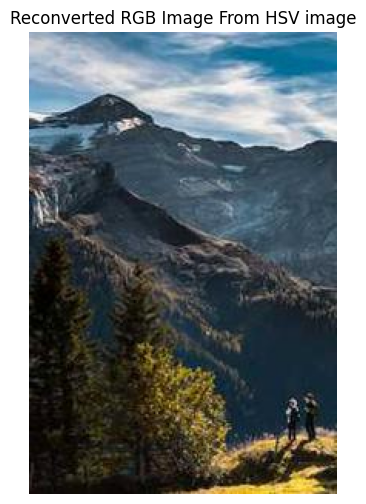

In [93]:
# Reconverting hsv to rgb image as asked
def reconvert_hsv_to_rgb(hsv_img):
  img_float=cv.cvtColor(hsv_img,cv.COLOR_HSV2RGB)
  return img_float
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reconvert_hsv_to_rgb(hsv_output))
plt.axis("off")
plt.title("Reconverted RGB Image From HSV image")



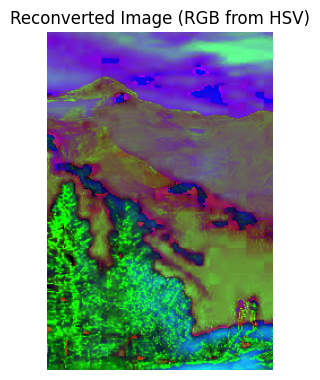

In [94]:
# This is just to confirm the above output image of HSV using numpy method.
def rgb_to_hsv_cv(img_rgb):
  hsv=cv.cvtColor(img_rgb,cv.COLOR_RGB2HSV)
  return hsv
plt.subplot(1, 2, 2)
plt.imshow(rgb_to_hsv_cv(img_rgb))
plt.axis("off")
plt.title("Reconverted Image (RGB from HSV)")
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [95]:
# I am doing birding and bird photography since 4 to 5 years and hence I am making the filter for Bird Portraits(especially when the background and the bird is a bit dull).
# Also an important point during bird and wildlife photography is that we dont want to overedit the photo.
# Overediting leads to a loss of sense as the edited image could be drastically different from the actual appearance.
# This can lead to the audience not connecting with the nature (which a wildlife photographer alsolutely doesnt want :) )
# Thus for portraits with dull colours we want to make some minor tweaking with the parameters.
# I have increased the contrast just a little bit so that the bird stands out a bit more against the dull background. Similiarly i have increased the saturation value just a tad little to make the colours more pronounced.
# Also i have added a gamma correction of 0.9. I found through tweaking with different values that this makes the image better and more as it is in the naturqal world.

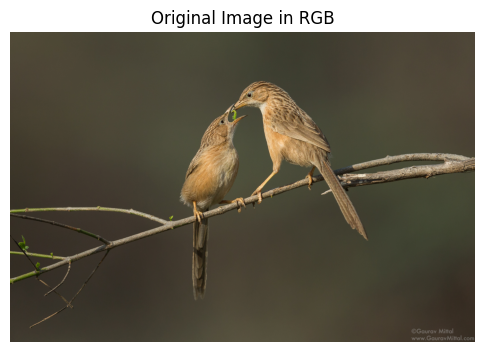

In [96]:
# Importing and plotting the rgb image
from PIL import Image
import requests
import io
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

url = "https://cdn.visualwilderness.com/wp-content/uploads/2016/10/Mittal_150328_0070-Edit.jpg"

response = requests.get(url)

image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img_bgr = cv.imdecode(image_array, cv.IMREAD_COLOR)

img_rgb=cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()

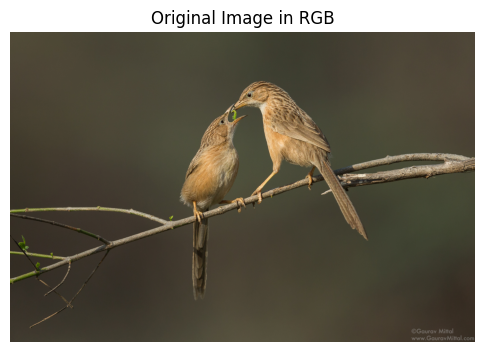

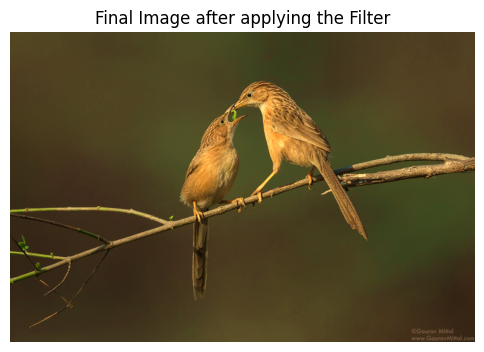

In [97]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
# Name of the filter = I am FeatherSome

# Filter 1: I am Feathersome ;)

def contrast(img_rgb, alpha, beta):
  adjusted_image = cv.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)
  return adjusted_image
def brightness(img_rgb, beta):
  bright=cv.convertScaleAbs(img_rgb,beta=beta)
  return bright
def saturation(img_rgb, alpha):
  hsv=cv.cvtColor(img_rgb,cv.COLOR_RGB2HSV)
  hsv[:,:,1]=np.clip(hsv[:,:,1]*alpha,0,255)
  saturation=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
  return saturation
def gamma(img_rgb, gamma):
  invGamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
  return cv.LUT(img_rgb, table)
def vibrance(img_rgb, alpha):
  hsv=cv.cvtColor(img_rgb,cv.COLOR_RGB2HSV)
  s=hsv[:,:,1]/255.0
  boost=0.35
  delta=(1-s)*boost
  hsv[:,:,1]=np.clip(hsv[:,:,1]+delta*255,0,255)
  vibrance=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
  return vibrance

def feather_some(img_rgb):

  contrast_adjusted=contrast(img_rgb,1.15,1)
  saturation_adjusted=saturation(contrast_adjusted,1.05)
  gamma_adjusted=gamma(saturation_adjusted,0.9)
  vibrance_adjusted=vibrance(gamma_adjusted,1)
  return vibrance_adjusted

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(feather_some(img_rgb))
plt.axis("off")
plt.title("Final Image after applying the Filter")
plt.show()




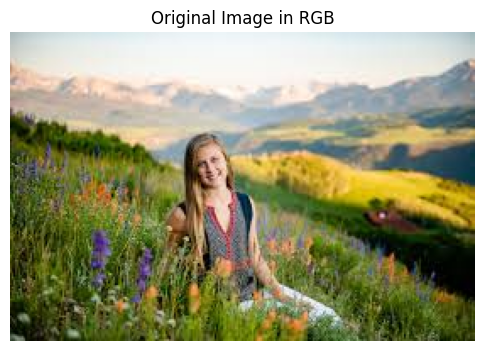

In [98]:
# Importing and plotting the rgb image
from PIL import Image
import requests
import io
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEfl3ROaiCGVssvcOR06GazYOyoL04eGieDg&s"
response = requests.get(url)

image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img_bgr = cv.imdecode(image_array, cv.IMREAD_COLOR)

img_rgb=cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()

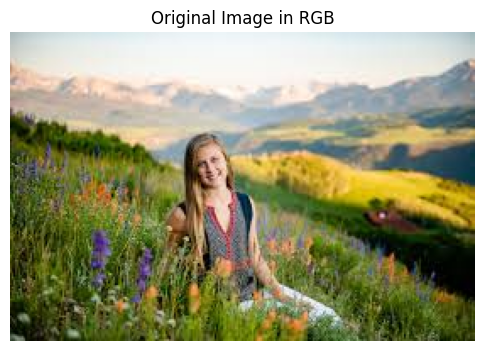

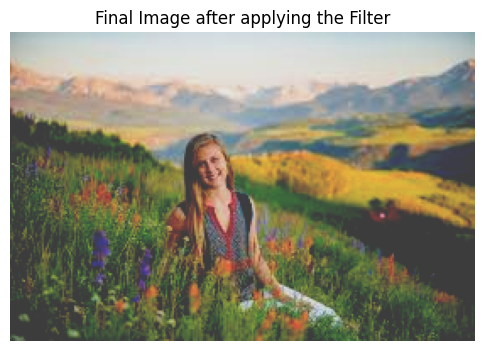

In [99]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

# Nature with a hint of fog:

def contrast(img_rgb, alpha, beta):
  adjusted_image = cv.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)
  return adjusted_image
def brightness(img_rgb, beta):
  bright=cv.convertScaleAbs(img_rgb,beta=beta)
  return bright
def saturation(img_rgb, alpha):
  hsv=cv.cvtColor(img_rgb,cv.COLOR_RGB2HSV)
  hsv[:,:,1]=np.clip(hsv[:,:,1]*alpha,0,255)
  saturation=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
  return saturation
def gamma(img_rgb, gamma):
  invGamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
  return cv.LUT(img_rgb, table)
def vibrance(img_rgb, alpha):
  hsv=cv.cvtColor(img_rgb,cv.COLOR_RGB2HSV)
  s=hsv[:,:,1]/255.0
  boost=0.01
  delta=(1-s)*boost
  hsv[:,:,1]=np.clip(hsv[:,:,1]+delta*255,0,255)
  vibrance=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
  return vibrance

def seeing_the_sea(img_rgb):

  contrast_adjusted=contrast(img_rgb,0.9,1.4) # decreasing the contrast by a little and brightening the overall image.
  saturation_adjusted=saturation(contrast_adjusted,1.4) # Adding a bit of Saturation to make the natural colours pop
  vibrance_adjusted=np.maximum(saturation_adjusted,60) # This ensure that no pixel is darker than 60. Hence this creates a slight faded film or a foggy look.
  return vibrance_adjusted

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(seeing_the_sea(img_rgb))
plt.axis("off")
plt.title("Final Image after applying the Filter")
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

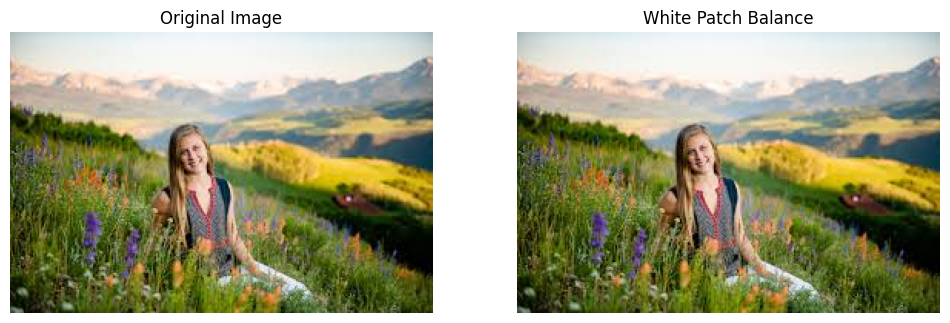

In [100]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
def white_patch_balance(img_rgb):
  img=img_rgb.astype(np.float32)

  r=img[:,:,0]
  g=img[:,:,1]
  b=img[:,:,2]

  max_r=np.max(r)
  max_g=np.max(g)
  max_b=np.max(b)


  r_scale=255.0/max_r if max_r > 0 else 1.0
  g_scale=255.0/max_g if max_g > 0 else 1.0
  b_scale=255.0/max_b if max_b > 0 else 1.0

  r_final=r*r_scale
  g_final=g*g_scale
  b_final=b*b_scale

  # Correctly stack channels to form (height, width, channels)
  final=np.stack((r_final,g_final,b_final), axis=-1)
  final=np.clip(final,0,255)

  return final.astype(np.uint8)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(white_patch_balance(img_rgb))
plt.axis("off")
plt.title("White Patch Balance")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

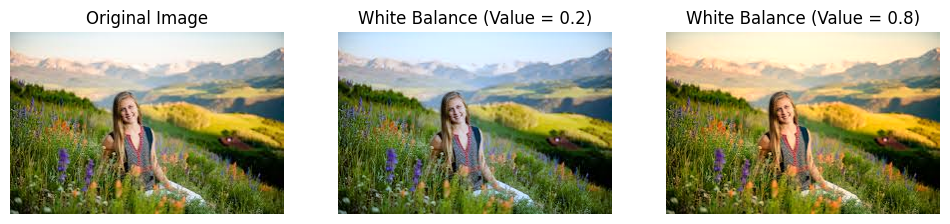

In [101]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

def rgb_to_hsv_simple(img_rgb_float):
  rgb_normalized = img_rgb_float / 255.0
  hsv_float = cv.cvtColor(rgb_normalized, cv.COLOR_RGB2HSV)
  return hsv_float

def hsv_to_rgb_simple(hsv_float):
  rgb_normalized = cv.cvtColor(hsv_float, cv.COLOR_HSV2RGB)
  rgb_denormalized = rgb_normalized * 255.0
  return rgb_denormalized

def white_balance(img_rgb, value):

    img = img_rgb.astype(np.float32)


    shift = (value - 0.5) # This will center the slider around 0.5 which is neutral
    red_factor = 1.0 + shift * 0.35      # Warm light has more red values and hence we increase red channel
    blue_factor = 1.0 - shift * 0.35     # Warm light has less blue values and hence we decrease blue channel
    green_factor = 1.0 + shift * 0.05

    img[..., 0] = img[..., 0] * red_factor
    img[..., 1] = img[..., 1] * green_factor
    img[..., 2] = img[..., 2] * blue_factor

    img = np.clip(img, 0, 255)

    # Saturation Adjustment

    hsv = rgb_to_hsv_simple(img)

    if value < 0.5:
        sat_boost = 1.0 - (0.5 - value) * 0.1  # Cool then desaturate
    else:
        sat_boost = 1.0 + (value - 0.5) * 0.15 # Warm then saturate

    hsv[..., 1] = np.clip(hsv[..., 1] * sat_boost, 0, 1)


    return hsv_to_rgb_simple(hsv).astype(np.uint8)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(white_balance(img_rgb, 0.2)) # Coldest version
plt.axis("off")
plt.title("White Balance (Value = 0.2)")

plt.subplot(1,3,3)
plt.imshow(white_balance(img_rgb, 0.8)) # Warmest version
plt.axis("off")
plt.title("White Balance (Value = 0.8)")
plt.show()